## DERIVATIVE PRICING
MODULE 1 | LESSON 4


---


# **MATCHING VOLATILITY AND RISK-MEASURES**


|  |  |
|:---|:---|
|**Reading Time** |  45 minutes |
|**Prior Knowledge** | Risk-neutral probability, Volatility, Time-step  |
|**Keywords** | Model calibration, Matching volatility|


---

*In the final notebook for Module 1, we will put all the previous concepts together to perform a complete valuation of a call option adjusting the binomial tree inputs $u$ and $d$ for the volatility of the underlying asset.*

*This adjusting step is the foundation of **model calibration**, which will be one of the keystones of the course and of derivative pricing in general.*

Let's start importing some of the libraries that we will need to use down the road:

In [1]:
import numpy as np

## 1. Adjusting $u$ and $d$ for Underlying Volatility


Let's start by adjusting the inputs $u$ and $d$ to match underlying volatility. As we have covered in the notes/videos for the lesson, we know that adjustment will lead to:

$u = e^{\sigma \sqrt{dt}}$ and $d=e^{-\sigma \sqrt{dt}}$

Now, assume that we know the underlying stock volatility for the next year (e.g., $\sigma =30\%$). (*For now, let's take this number as given*.)

We can modify our previous functions to incorporate the volatility adjustment to $u$ and $d$:<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

In [2]:
def call_option_delta(S_ini, K, T, r, sigma, N):
    dt = T / N  # Define time step
    u = np.exp(sigma * np.sqrt(dt))  # Define u
    d = np.exp(-sigma * np.sqrt(dt))  # Define d
    p = (np.exp(r * dt) - d) / (u - d)  # risk neutral probs
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta
    for i in range(0, N + 1):
        C[N, i] = max(S_ini * (u ** (i)) * (d ** (N - i)) - K, 0)
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i])
            S[j, i] = S_ini * (u ** (i)) * (d ** (j - i))
            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )
    return C[0, 0], C, S, Delta

## 2. Convergence

Let's see what the call option ($K=90$, $r=0\%$, $T=1$, $\sigma=0.3$) price is for different N's:

In [3]:
price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]:
    call_price, C, S, delta = call_option_delta(100, 90, 1, 0, 0.3, N)
    price_array.append(call_price)
    print("With N = {:3d}, the price is {:.2f}".format(N, call_price))

With N =   1, the price is 19.14
With N =  10, the price is 17.26
With N = 100, the price is 17.02
With N = 200, the price is 17.03
With N = 300, the price is 17.01
With N = 400, the price is 17.02
With N = 500, the price is 17.01
With N = 600, the price is 17.02
With N = 700, the price is 17.02
With N = 800, the price is 17.01
With N = 900, the price is 17.01
With N = 1000, the price is 17.02
With N = 1500, the price is 17.01
With N = 2000, the price is 17.01
With N = 2500, the price is 17.01


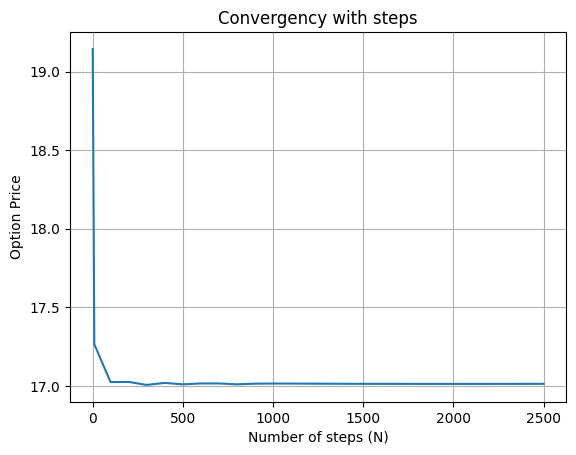

In [4]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 2500]
plt.plot(N, np.array(price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

As we can see in the graph above, the price of the call option now clearly converges to a price of $c = 17.01$. 

## 3. How Do We Obtain $\sigma$ ?

Obtaining the volatility of the underlying asset in order to calibrate the model is one of the most challenging tasks that we will face.

For now, we have taken this input as a given. However, in reality, we would need to estimate this somehow. Can you think of how to do it?

* Historical asset volatility (e.g., last year) ? → But this relies on the past = No good

* Implied asset volatility ? → implied by what? → Exchange-traded option prices

We will do a deep analysis of the latter point during the course. For now, just think about the following idea:

If we have an exchange-traded option (for which the **price is set by supply and demand**) and a **pricing equation** that depends on parameters (including $\sigma$), we can resolve this equation and **extract the volatility implied by that price.**

We will come back to this concept in the future. For now, you can explore this by looking at the Options Chain for Apple (AAPL) [in Yahoo! Finance.](https://finance.yahoo.com/quote/AAPL/options?p=AAPL)


## 4. Conclusion

Throughout this lesson, we have worked on a simple model calibration, something that will become very relevant when dealing with more complex models. We will be constantly revisiting model calibration throughout the course, so make sure you grasp the concept fully. 

In the next module, we will revisit most of these ideas for the case of American options.

See you in Module 2!

---
Copyright 2025 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
